# Bernoulli and Binomial Distribution - Lab

## Introduction
In this lab, you'll practice your newly gained knowledge on the Bernoulli and Binomial Distribution.

## Objectives
You will be able to:

* Apply the formulas for the Binomial and Bernoulli distribution to calculate the probability of a specific event
* Use `numpy` to randomly generate Binomial and Bernoulli trials
* Use `matplotlib` to show the output of generated Binomial and Bernoulli trials

## Apply the formulas for the Binomial and Bernoulli distributions

When playing a game of bowling, what is the probability of throwing exactly 3 strikes in a game with 10 rounds? Assume that the probability of throwing a strike is 25% for each round. Use the formula for the Binomial distribution to get to the answer. You've created this before, so we provide you with the function for factorials again:

In [1]:
def factorial(n):
    prod = 1
    while n >= 1:
        prod = prod * n
        n = n - 1
    return prod

In [2]:
def binomail_coeffecent(n,k):
    return factorial(n)/(factorial(n-k)*factorial(k))

In [3]:
def binomial_pmf(n, p ,k):
    return binomail_coeffecent(n, k)*p**k*(1-p)**(n-k)

In [4]:
p_3_strikes = binomial_pmf(10, 0.25, 3) #answer = 0.2502822
p_3_strikes

0.25028228759765625

Now, create a function for the Binomial distribution with three arguments $n$, $p$ and $k$ just like in the formula:

$$ \large P(Y=k)= \binom{n}{k} p^k(1-p)^{(n-k)}$$ 


See above

Validate your previous result by applying your new function.

In [5]:
binomial_pmf(10,0.25,3) # Your code here

0.25028228759765625

Now write a `for` loop along with your function to compute the probability that you have five strikes or more in one game. You'll want to use `numpy` here!

In [8]:
def binomail_cdf(n, p, k):
    return sum([binomial_pmf(n, p, j) for j in range(k+1)])

In [9]:
import numpy as np
# Your code here
P = 1 - binomail_cdf(10, 0.25, 4)
P

0.07812690734863281

## Use a simulation to get the probabilities for all the potential outcomes

Repeat the experiment 5000 times.

In [33]:
# leave the random seed here for reproducibility of results
import numpy as np

def simulate_frame(p):
    frame = { 'strike': [1, 0], 'prob': [p , 1-p]}
    return np.random.choice(frame['strike'], p=frame['prob'])

def simulate_game(p):
    strike_sum = 0
    for i in range(10):
        strike_sum += simulate_frame(p)
    return strike_sum

def games_experiment(N,p):
    frequencies = dict()
    for i in range(N):
        strike_count = simulate_game(p)
        frequencies[strike_count] = frequencies.get(strike_count,0) + 1
    return frequencies
      
simulated_frequencies = games_experiment(5000, 0.25)
for key in sorted(simulated_frequencies.keys()):
    print(key, simulated_frequencies[key])

0 255
1 926
2 1391
3 1275
4 777
5 271
6 87
7 17
8 1


In [ ]:
# the results should look like this:
# [0 1 2 3 4 5 6 7 8]
# [ 310  941 1368 1286  707  297   78   11    2]

## Visualize these results

Create the PMF using these empirical results (that is, the proportions based on the values we obtained running the experiment 5000 times).

In [43]:
def frequencies_to_pmf(freq):
    N = sum(freq.values())
    pmf = { key:value/N for (key,value) in freq.items()}
    return pmf

In [44]:
simulated_pmf = frequencies_to_pmf(simulated_frequencies)

<BarContainer object of 9 artists>

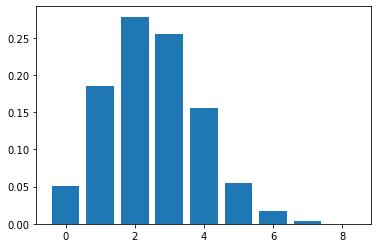

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.bar(x=simulated_pmf.keys(), height=simulated_pmf.values())
#
#
#
#

You should see that, with a 25% strike hit rate, even when simulating 5000 times, an almost perfect and/or perfect game of 9 and 10 strikes didn't even occur once! If you change the random seed, however, you'll see that perfect games will show up occasionally. 

Next, let's create the CDF based on these results. You can use `np.cumsum` to obtain cumulative probabilities.

In [49]:
def pmf_to_cdf(pmf):
    cdf = dict()
    cumsum = 0
    for key in sorted(pmf.keys()):
        cumsum += pmf[key]
        cdf[key] = cumsum
    return cdf

In [52]:
simulated_cdf = pmf_to_cdf(simulated_pmf)
for key in sorted(simulated_cdf.keys()):
    print(key, round(simulated_cdf[key], 6))

0 0.051
1 0.2362
2 0.5144
3 0.7694
4 0.9248
5 0.979
6 0.9964
7 0.9998
8 1.0


## Summary

Congratulations! In this lab, you practiced your newly gained knowledge of the Bernoulli and Binomial Distribution.